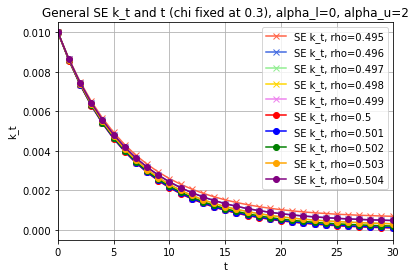

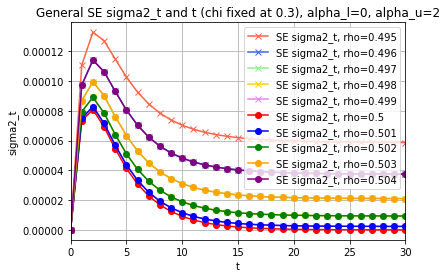

In [291]:
#Homework-9 General AMP and SE for Gaussian labeled-unlabeled
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

def se2(rho1,chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    rho = rho1
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    def y_s(p,t):
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
        return y_gst

    def F(p,t): #F function
        return y_s(p,t)/(np.sqrt(t))

    def T(p,t): #T function
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

SEcollect = []
idx_ = []
for i in np.arange(0.495,0.505,0.001):
    memo = se2(i,0.3,0,2)
    SEcollect.append(memo)
    idx = []
    for index in range(memo[2]+1):
        idx.append(index)
    idx_.append(idx)
plt.plot(idx_[0],SEcollect[0][0],c="tomato",label="SE k_t, rho=0.495",marker="x")
plt.plot(idx_[1],SEcollect[1][0],c="royalblue",label="SE k_t, rho=0.496",marker="x")
plt.plot(idx_[2],SEcollect[2][0],c="lightgreen",label="SE k_t, rho=0.497",marker="x")
plt.plot(idx_[3],SEcollect[3][0],c="gold",label="SE k_t, rho=0.498",marker="x")
plt.plot(idx_[4],SEcollect[4][0],c="violet",label="SE k_t, rho=0.499",marker="x")
plt.plot(idx_[5],SEcollect[5][0],c="r",label="SE k_t, rho=0.5",marker="o")
plt.plot(idx_[6],SEcollect[6][0],c="b",label="SE k_t, rho=0.501",marker="o")
plt.plot(idx_[7],SEcollect[7][0],c="g",label="SE k_t, rho=0.502",marker="o")
plt.plot(idx_[8],SEcollect[8][0],c="orange",label="SE k_t, rho=0.503",marker="o")
plt.plot(idx_[9],SEcollect[9][0],c="purple",label="SE k_t, rho=0.504",marker="o")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General SE k_t and t (chi fixed at 0.3), alpha_l=0, alpha_u=2")
plt.ylabel("k_t")
plt.xlabel("t")
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

plt.plot(idx_[0],SEcollect[0][1],c="tomato",label="SE sigma2_t, rho=0.495",marker="x")
plt.plot(idx_[1],SEcollect[1][1],c="royalblue",label="SE sigma2_t, rho=0.496",marker="x")
plt.plot(idx_[2],SEcollect[2][1],c="lightgreen",label="SE sigma2_t, rho=0.497",marker="x")
plt.plot(idx_[3],SEcollect[3][1],c="gold",label="SE sigma2_t, rho=0.498",marker="x")
plt.plot(idx_[4],SEcollect[4][1],c="violet",label="SE sigma2_t, rho=0.499",marker="x")
plt.plot(idx_[5],SEcollect[5][1],c="r",label="SE sigma2_t, rho=0.5",marker="o")
plt.plot(idx_[6],SEcollect[6][1],c="b",label="SE sigma2_t, rho=0.501",marker="o")
plt.plot(idx_[7],SEcollect[7][1],c="g",label="SE sigma2_t, rho=0.502",marker="o")
plt.plot(idx_[8],SEcollect[8][1],c="orange",label="SE sigma2_t, rho=0.503",marker="o")
plt.plot(idx_[9],SEcollect[9][1],c="purple",label="SE sigma2_t, rho=0.504",marker="o")
#plt.plot(idx_[10],SEcollect[10][2],c="indigo",label="SE sigma2_t, rho=1",marker="o")
plt.title("General SE sigma2_t and t (chi fixed at 0.3), alpha_l=0, alpha_u=2")
plt.ylabel("sigma2_t")
plt.xlabel("t")
#plt.ylim(0,0.00005)
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

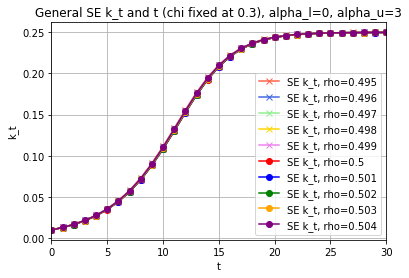

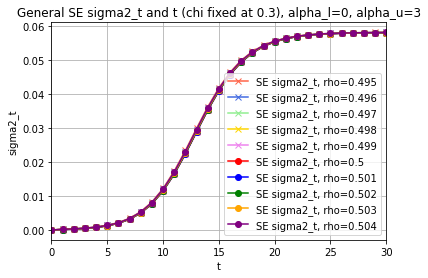

In [292]:
SEcollect = []
idx_ = []
for i in np.arange(0.495,0.505,0.001):
    memo = se2(i,0.3,0,3)
    SEcollect.append(memo)
    idx = []
    for index in range(memo[2]+1):
        idx.append(index)
    idx_.append(idx)
plt.plot(idx_[0],SEcollect[0][0],c="tomato",label="SE k_t, rho=0.495",marker="x")
plt.plot(idx_[1],SEcollect[1][0],c="royalblue",label="SE k_t, rho=0.496",marker="x")
plt.plot(idx_[2],SEcollect[2][0],c="lightgreen",label="SE k_t, rho=0.497",marker="x")
plt.plot(idx_[3],SEcollect[3][0],c="gold",label="SE k_t, rho=0.498",marker="x")
plt.plot(idx_[4],SEcollect[4][0],c="violet",label="SE k_t, rho=0.499",marker="x")
plt.plot(idx_[5],SEcollect[5][0],c="r",label="SE k_t, rho=0.5",marker="o")
plt.plot(idx_[6],SEcollect[6][0],c="b",label="SE k_t, rho=0.501",marker="o")
plt.plot(idx_[7],SEcollect[7][0],c="g",label="SE k_t, rho=0.502",marker="o")
plt.plot(idx_[8],SEcollect[8][0],c="orange",label="SE k_t, rho=0.503",marker="o")
plt.plot(idx_[9],SEcollect[9][0],c="purple",label="SE k_t, rho=0.504",marker="o")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General SE k_t and t (chi fixed at 0.3), alpha_l=0, alpha_u=3")
plt.ylabel("k_t")
plt.xlabel("t")
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

plt.plot(idx_[0],SEcollect[0][1],c="tomato",label="SE sigma2_t, rho=0.495",marker="x")
plt.plot(idx_[1],SEcollect[1][1],c="royalblue",label="SE sigma2_t, rho=0.496",marker="x")
plt.plot(idx_[2],SEcollect[2][1],c="lightgreen",label="SE sigma2_t, rho=0.497",marker="x")
plt.plot(idx_[3],SEcollect[3][1],c="gold",label="SE sigma2_t, rho=0.498",marker="x")
plt.plot(idx_[4],SEcollect[4][1],c="violet",label="SE sigma2_t, rho=0.499",marker="x")
plt.plot(idx_[5],SEcollect[5][1],c="r",label="SE sigma2_t, rho=0.5",marker="o")
plt.plot(idx_[6],SEcollect[6][1],c="b",label="SE sigma2_t, rho=0.501",marker="o")
plt.plot(idx_[7],SEcollect[7][1],c="g",label="SE sigma2_t, rho=0.502",marker="o")
plt.plot(idx_[8],SEcollect[8][1],c="orange",label="SE sigma2_t, rho=0.503",marker="o")
plt.plot(idx_[9],SEcollect[9][1],c="purple",label="SE sigma2_t, rho=0.504",marker="o")
#plt.plot(idx_[10],SEcollect[10][2],c="indigo",label="SE sigma2_t, rho=1",marker="o")
plt.title("General SE sigma2_t and t (chi fixed at 0.3), alpha_l=0, alpha_u=3")
plt.ylabel("sigma2_t")
plt.xlabel("t")
#plt.ylim(0,0.00005)
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

In [330]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.4

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 900  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 35.91031503677368 seconds_pre-store ---


In [331]:
amp2_update = amp2(0.3)

In [332]:
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

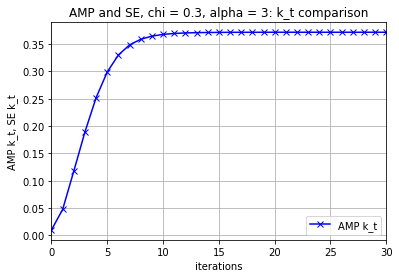

In [333]:
plt.plot(idx,amp2_update[2],c="b",label="AMP k_t",marker="x")
plt.title("AMP and SE, chi = 0.3, alpha = 3: k_t comparison")
plt.ylabel("AMP k_t, SE k_t")
#plt.xlim(0,30)
plt.xlabel("iterations")
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

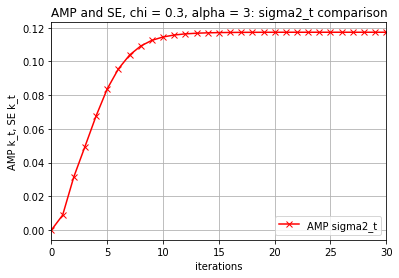

In [334]:
plt.plot(idx,amp2_update[3],c="r",label="AMP sigma2_t",marker="x")
plt.title("AMP and SE, chi = 0.3, alpha = 3: sigma2_t comparison")
plt.ylabel("AMP k_t, SE k_t")
#plt.xlim(0,30)
plt.xlabel("iterations")
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

In [335]:
SEcollect = se2(0.3,0,3)

In [336]:
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

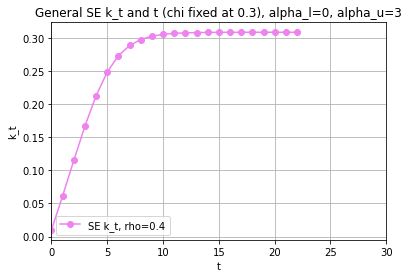

In [337]:
plt.plot(idx2,SEcollect[0],c="violet",label="SE k_t, rho=0.4",marker="o")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General SE k_t and t (chi fixed at 0.3), alpha_l=0, alpha_u=3")
plt.ylabel("k_t")
plt.xlabel("t")
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

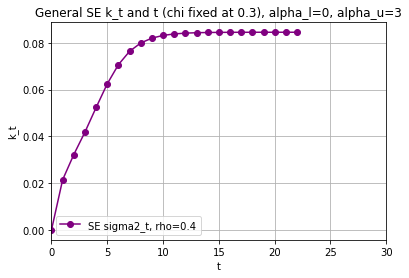

In [338]:
plt.plot(idx2,SEcollect[1],c="purple",label="SE sigma2_t, rho=0.4",marker="o")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General SE k_t and t (chi fixed at 0.3), alpha_l=0, alpha_u=3")
plt.ylabel("k_t")
plt.xlabel("t")
plt.xlim(0,30)
plt.grid()
plt.legend()
plt.show()

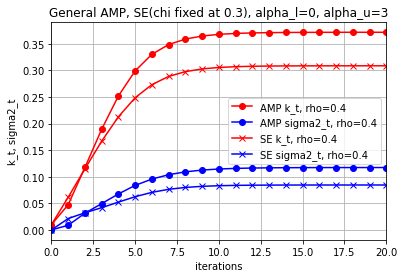

In [345]:
plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.4",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.4",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.4",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.4",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3), alpha_l=0, alpha_u=3")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.show()

In [347]:
minlen=min(l,l2)
minlen

23

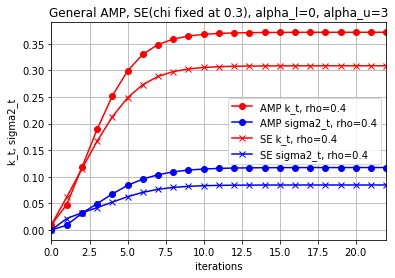

In [351]:
plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.4",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.4",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.4",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.4",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3), alpha_l=0, alpha_u=3")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [354]:
amp2_update[2]

[0.01,
 0.04748689965797398,
 0.11765799831597029,
 0.1893873996058229,
 0.25213765105028235,
 0.2991762934288375,
 0.3303014451734852,
 0.3486399027144962,
 0.35890879772903345,
 0.3646428523438469,
 0.36781844840541955,
 0.3695496660343773,
 0.37050592934844434,
 0.3710393375481346,
 0.3713445019811725,
 0.37152249879785504,
 0.37162597634495687,
 0.3716871015414174,
 0.37172358224934493,
 0.37174575139137433,
 0.37175981201076097,
 0.37176919959716914,
 0.3717725164741109,
 0.3717762796963113,
 0.37177892793579287,
 0.37177973515843754,
 0.37178072501508896,
 0.3717820116000624,
 0.37178051189543604,
 0.37178090621823695,
 0.3717772455058986,
 0.37177778801803774,
 0.37177887598621256,
 0.37177909320081987,
 0.3717797119803644,
 0.3717805266155377,
 0.3717784427899502,
 0.37178005405346926,
 0.3717811886783685,
 0.37177965907436944,
 0.3717790524487063,
 0.3717790662304966,
 0.37178106681550305,
 0.3717805796679347,
 0.3717796165888078,
 0.37178136853135735,
 0.371781869536678,
 0.3

In [355]:
amp2_update[3]

[0.0,
 0.008788285324814373,
 0.03145447276141242,
 0.0494681468714121,
 0.06770183233630751,
 0.08378761846234563,
 0.09562673721046773,
 0.10382242466961077,
 0.10919524406998939,
 0.1125484384227303,
 0.11454646091359524,
 0.11570562392676963,
 0.1163769971733322,
 0.11677155846020766,
 0.11700403989882342,
 0.11714085105678995,
 0.11722396363347247,
 0.11727225160052798,
 0.11730193175334612,
 0.1173188652808057,
 0.11732958973762003,
 0.11733662956716856,
 0.11734071768313135,
 0.11734241904171866,
 0.11734506972458936,
 0.11734618269991325,
 0.11734591478364723,
 0.11734509137814272,
 0.11734614669410745,
 0.11734670933725386,
 0.11734535562254171,
 0.11734580040051837,
 0.11734533354450481,
 0.11734580493215284,
 0.11734537637042353,
 0.11734488940907367,
 0.1173447011395172,
 0.11734503831581333,
 0.11734434330701848,
 0.117345566803168,
 0.11734490138323408,
 0.1173464004473697,
 0.11734633051709191,
 0.11734587583551147,
 0.11734558493467202,
 0.11734624237615326,
 0.11734700

In [356]:
SEcollect[0]

[0.01,
 0.06163095181722336,
 0.11497566959345305,
 0.16699382197314339,
 0.2128827330448483,
 0.2486104345819558,
 0.2732661882036494,
 0.28870044969659797,
 0.29772745774711323,
 0.3027772469117732,
 0.3055291340127923,
 0.3070106917361411,
 0.3078010439539954,
 0.3082176151338371,
 0.3084353626818927,
 0.30855236018439236,
 0.3086152395229427,
 0.30864842819444355,
 0.30866791304740715,
 0.30869426278693507,
 0.3086987443135654,
 0.30869868871828904,
 0.30869868871828904]

In [357]:
SEcollect[1]

[0,
 0.02143621258253676,
 0.03221446253606798,
 0.04183542354196794,
 0.05233012227387066,
 0.062468501519469,
 0.07065839387975067,
 0.076351841749281,
 0.07990937225673785,
 0.08198319248590841,
 0.08314106557459794,
 0.08377236052253746,
 0.08411139384541841,
 0.08429189437338348,
 0.08438734798967913,
 0.084437701272949,
 0.08446439255679367,
 0.08447874901484721,
 0.0844853980090654,
 0.0844935340918577,
 0.08449564478074337,
 0.08449568315378257,
 0.08449568315378257]

In [358]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.3

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 900  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 47.23836803436279 seconds_pre-store ---


In [360]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,3)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

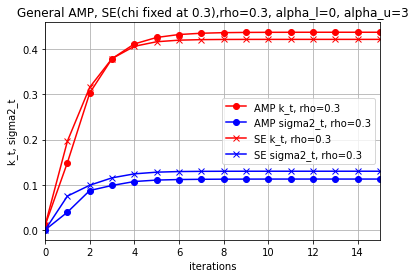

In [361]:
plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.3",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.3",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.3",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.3",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.3, alpha_l=0, alpha_u=3")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [362]:
amp2_update[2]

[0.01,
 0.14912190320004723,
 0.30312344926527707,
 0.37921644979905156,
 0.4117606519719799,
 0.42607825449401027,
 0.43256819607700797,
 0.4353998446845126,
 0.43668990554423187,
 0.4372317993313402,
 0.4374494308724357,
 0.43754603235583717,
 0.43758421239444945,
 0.43759935737359473,
 0.43760470432796256,
 0.4376053219340927,
 0.4376050764177601,
 0.437605112111941,
 0.4376053464661241,
 0.4376041953764741,
 0.4376029382898474,
 0.4376040914871032,
 0.4376043513047548,
 0.4376053803271348,
 0.43760483139157885,
 0.4376059912349712,
 0.4376055225544445,
 0.4376041621153796,
 0.4376046724405348,
 0.4376065799187672,
 0.43760611792054005,
 0.43760536222399554,
 0.437603973064853,
 0.43760459188702183,
 0.437604391672507,
 0.4376053012622368,
 0.4376043221372714,
 0.4376046840814509,
 0.437605133226193,
 0.437605411732094,
 0.4376045701729987,
 0.43760494757054136,
 0.43760501004902164,
 0.4376051950226956,
 0.437604662386031,
 0.4376032062263857,
 0.43760466426644434,
 0.4376059368053

In [363]:
amp2_update[3]

[0.0,
 0.039258725645655704,
 0.08723552597200203,
 0.09843512010516736,
 0.10712632223646384,
 0.11035149227973566,
 0.1115500222461315,
 0.11207450341290717,
 0.11233429307350412,
 0.1124871182016513,
 0.11256513539599122,
 0.11258789396044734,
 0.11259556404736477,
 0.11259756258051123,
 0.11259817337619545,
 0.11259938341487621,
 0.11259929650565227,
 0.11259875618555777,
 0.11259963010117363,
 0.11259853546647548,
 0.1125986330803741,
 0.1125992900819482,
 0.11259937057315508,
 0.11259979229576779,
 0.11260017561106848,
 0.11259948034401743,
 0.11259967792096014,
 0.11259895836639228,
 0.11259905881825784,
 0.11259942821079927,
 0.11259968642483098,
 0.11259974567409163,
 0.11259852176124027,
 0.11259941370170339,
 0.11260001459782754,
 0.1125993902343505,
 0.1125993646674101,
 0.11259929384437595,
 0.11259997181635839,
 0.11259988319837462,
 0.1125993511957938,
 0.11259882864568103,
 0.11259973308551018,
 0.1125992178617146,
 0.11259883381239777,
 0.11259922747520956,
 0.11259882

In [364]:
SEcollect[0]

[0.01,
 0.1966120948722056,
 0.31588373664748065,
 0.3793888858519648,
 0.40650271513781716,
 0.41657566981859184,
 0.42007285722142906,
 0.42124126520640814,
 0.42162815881641197,
 0.42175673518826,
 0.42179894719523386,
 0.4218142138594296,
 0.42181838564599256,
 0.421819047835218,
 0.4218190487298541,
 0.4218190487298541]

In [365]:
SEcollect[1]

[0,
 0.07492663178288028,
 0.09893866102241788,
 0.11532631363339338,
 0.12412180513653523,
 0.1278378733362084,
 0.12921339188022946,
 0.12968802006530641,
 0.1298475544256358,
 0.12990040125882552,
 0.12991787917114617,
 0.12992385670053233,
 0.1299260406124631,
 0.12992637714141284,
 0.12992637766383802,
 0.12992637766383802]

In [366]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.2

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 900  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 46.48432517051697 seconds_pre-store ---


In [367]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,3)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

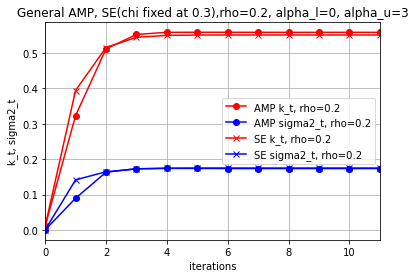

In [368]:
plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.2",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.2",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.2",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.2",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.2, alpha_l=0, alpha_u=3")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [369]:
amp2_update[2]

[0.01,
 0.32308318626824073,
 0.5117597364602232,
 0.5528465503046137,
 0.5587422966506368,
 0.5590530155097472,
 0.5589382891752477,
 0.5588307728285282,
 0.5587945606308984,
 0.5587940302335517,
 0.5587979288306865,
 0.5587994405662176,
 0.5587991849699818,
 0.5587989336528113,
 0.5587986126128226,
 0.558799860935912,
 0.5587995243132146,
 0.5587992971317565,
 0.5587992353044299,
 0.5587999257696051,
 0.5588000219996032,
 0.5587999990750391,
 0.5587998187800562,
 0.5588002295904476,
 0.5587992023033139,
 0.5588002434665092,
 0.5588000762937583,
 0.5587990586513875,
 0.5588003785807114,
 0.5587999633266219,
 0.5587992494294686,
 0.5587995091343871,
 0.5587986787846871,
 0.5587991412920775,
 0.5587989446222779,
 0.5587990361082409,
 0.5587984208607167,
 0.5587990766185675,
 0.5587988400248353,
 0.5588000157489804,
 0.5587994839934267,
 0.5587997273620118,
 0.5587995779562762,
 0.5587999902955196,
 0.5587993444755163,
 0.5587995324171093,
 0.5588002619995387,
 0.5587997724854555,
 0.558

In [370]:
amp2_update[3]

[0.0,
 0.08949489628356883,
 0.16302473109948437,
 0.17311297467148426,
 0.17403910130630962,
 0.17387276953802733,
 0.17357215490358216,
 0.17347343234177556,
 0.17347832163490198,
 0.17348253814910572,
 0.17348407955012538,
 0.17348382520362235,
 0.17348395760967955,
 0.17348490772266187,
 0.17348417446195,
 0.1734840615172779,
 0.17348421368741684,
 0.17348433382898504,
 0.1734839613244983,
 0.17348374326698773,
 0.1734850365669528,
 0.17348448847207928,
 0.17348409141056867,
 0.1734842038335751,
 0.17348462926729966,
 0.17348395976126238,
 0.17348429860693781,
 0.1734847167898921,
 0.173485159002179,
 0.17348478990989818,
 0.1734840894436325,
 0.17348412391385445,
 0.17348367288082697,
 0.1734841685283991,
 0.17348443988571818,
 0.17348436266662087,
 0.17348371393047213,
 0.17348440473178778,
 0.17348502682465713,
 0.17348374104126782,
 0.17348437915241352,
 0.17348402421656095,
 0.17348413583566283,
 0.17348430263182413,
 0.17348376772212246,
 0.17348523574016111,
 0.1734845412307

In [371]:
SEcollect[0]

[0.01,
 0.39424891854691474,
 0.5158100519519176,
 0.544711219940905,
 0.5501580218728326,
 0.5510932435484537,
 0.5512495166050875,
 0.5512744389687885,
 0.551279906786824,
 0.5512809246606721,
 0.5512809249550186,
 0.5512809249550186]

In [372]:
SEcollect[1]

[0,
 0.14158128763371283,
 0.16435394380315413,
 0.17254900437825707,
 0.17442900183536392,
 0.17477918368924797,
 0.17483944205169896,
 0.1748492603311582,
 0.17485101337533326,
 0.1748514203371155,
 0.174851420511186,
 0.174851420511186]

In [373]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.2

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 600  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 48.36763381958008 seconds_pre-store ---


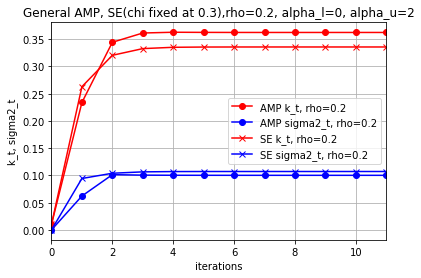

In [374]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,2)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.2",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.2",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.2",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.2",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.2, alpha_l=0, alpha_u=2")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [375]:
amp2_update[2]

[0.01,
 0.23382864488585406,
 0.3443017812882314,
 0.3613313616134782,
 0.36272609257688315,
 0.36247196166682016,
 0.36235458394943315,
 0.3623312725360982,
 0.3623322913799836,
 0.3623324125990133,
 0.362331372604394,
 0.36233176886129,
 0.36233200625729706,
 0.3623309876279514,
 0.3623307418529302,
 0.3623309948206094,
 0.36233101702194176,
 0.3623313045872452,
 0.3623307263441164,
 0.3623311223456641,
 0.3623309486036576,
 0.36233059741986506,
 0.36233112033116266,
 0.3623306552423077,
 0.36233095754054373,
 0.36233057037798855,
 0.36233056183618445,
 0.362330882274667,
 0.3623309809130983,
 0.36233069134125007,
 0.36233092036706355,
 0.36233110782978545,
 0.36233063559071627,
 0.36233095182730096,
 0.36233121104161586,
 0.3623308055237071,
 0.3623310295166765,
 0.3623311568027776,
 0.3623305350661272,
 0.3623311221231416,
 0.3623312438100771,
 0.3623308912662287,
 0.3623308837003995,
 0.36233081040948734,
 0.3623311441961956,
 0.36233110545032243,
 0.3623305642183108,
 0.362331263

In [376]:
amp2_update[3]

[0.0,
 0.062198900256186,
 0.10138014260046437,
 0.10052658793680799,
 0.10029118709017462,
 0.1002262748056093,
 0.10019212053579248,
 0.10018444775592841,
 0.10018437226692244,
 0.10018425798682926,
 0.10018417172155922,
 0.10018409495259581,
 0.10018372540101908,
 0.10018386601826224,
 0.10018377065824302,
 0.10018380896517722,
 0.10018379969101014,
 0.10018385779007845,
 0.10018389780640971,
 0.10018384537626394,
 0.10018401642921813,
 0.10018362447763904,
 0.10018352720349466,
 0.10018364426736233,
 0.10018377299823021,
 0.10018395708166028,
 0.10018391941660729,
 0.10018386168038063,
 0.10018404308238958,
 0.10018375380272275,
 0.10018387336109993,
 0.10018408670417031,
 0.10018414308134886,
 0.10018385800623687,
 0.10018358413850881,
 0.10018372260857944,
 0.10018375912284075,
 0.10018373533316823,
 0.10018388829507358,
 0.10018369354267836,
 0.10018370378292733,
 0.10018377498763564,
 0.1001836035234457,
 0.1001838416681298,
 0.10018375963497028,
 0.10018371071664829,
 0.100183

In [377]:
SEcollect[0]

[0.01,
 0.2628326123646098,
 0.32039946233332023,
 0.33269143753348185,
 0.3351131837745228,
 0.33557957089014684,
 0.335669776016391,
 0.335685941755061,
 0.33568970980575014,
 0.33569085259928694,
 0.3356908270053488,
 0.3356908270053488]

In [378]:
SEcollect[1]

[0,
 0.09438752508914189,
 0.10398993872947751,
 0.106522940615918,
 0.10705874285688852,
 0.1071640308247116,
 0.10718444279813598,
 0.10718812717560981,
 0.10718900445434221,
 0.10718918273222158,
 0.10718919391915464,
 0.10718919391915464]

In [379]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.3

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 600  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 40.8024468421936 seconds_pre-store ---


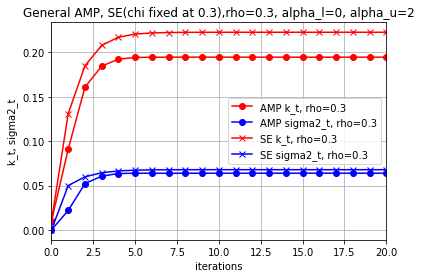

In [380]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,2)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.3",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.3",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.3",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.3",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.3, alpha_l=0, alpha_u=2")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [381]:
amp2_update[2]

[0.01,
 0.0910821580081165,
 0.16086181518221715,
 0.18448090596288136,
 0.19235966212316574,
 0.19424102445818914,
 0.19451657692272464,
 0.19458889887808625,
 0.19459841634838837,
 0.19459286005605947,
 0.19458665341636555,
 0.1945787425551576,
 0.19457373415847626,
 0.19457182759603386,
 0.19457237944609299,
 0.1945720293740113,
 0.1945706497297392,
 0.19457028222328018,
 0.19457186498462178,
 0.19457242594636903,
 0.19457302115207528,
 0.19457408844460494,
 0.19457289843703962,
 0.19457352866431235,
 0.19457325809008963,
 0.19457333539151936,
 0.19457195486500672,
 0.19457287467862994,
 0.19457324318070357,
 0.1945718878968585,
 0.19457129218719052,
 0.19457053186233841,
 0.19457119859055821,
 0.19457139384244812,
 0.19457158832723123,
 0.1945714042945939,
 0.19457147115929962,
 0.19457026238037037,
 0.1945715485622203,
 0.19457160176035032,
 0.1945726401700939,
 0.1945718643544546,
 0.19457198641541965,
 0.1945708003305903,
 0.1945721602438976,
 0.19457123219466518,
 0.19457200615

In [382]:
amp2_update[3]

[0.0,
 0.021911454794329065,
 0.05211185399560172,
 0.06057627877983103,
 0.06348523690537702,
 0.06389937349088957,
 0.06382174873284789,
 0.06379315896982629,
 0.0638319386486675,
 0.06386584118913781,
 0.06388149826529174,
 0.06388595553763157,
 0.06388611198135219,
 0.0638863059637541,
 0.06388688505151718,
 0.06388702929014163,
 0.06388689385962339,
 0.06388705952229581,
 0.06388703420014097,
 0.06388682216653874,
 0.06388643699508499,
 0.06388664707044742,
 0.06388649224096071,
 0.06388693982078243,
 0.06388623709321858,
 0.06388609871483521,
 0.06388696353711987,
 0.06388722255960154,
 0.06388670003065729,
 0.06388686998179786,
 0.06388711399976643,
 0.06388761227488174,
 0.06388727902281968,
 0.06388732657124105,
 0.0638868351195262,
 0.0638871857670083,
 0.0638873774366913,
 0.0638868748804462,
 0.06388761067566072,
 0.06388799955241374,
 0.06388806111866423,
 0.06388797498876235,
 0.063887774976571,
 0.06388754953277866,
 0.06388685282272641,
 0.06388784989698273,
 0.06388729

In [383]:
SEcollect[0]

[0.01,
 0.13107472991480373,
 0.1848969198256985,
 0.20791744669376044,
 0.21706996015328983,
 0.22056586240608772,
 0.2218753856036155,
 0.22236308069881525,
 0.2225450626071873,
 0.22261175095620048,
 0.22263567383726765,
 0.22264523082851154,
 0.2226484552037691,
 0.22265046403977812,
 0.22265241154769685,
 0.2226541700750582,
 0.22265559938712925,
 0.22265729527997893,
 0.2226580121137486,
 0.22265801271203786,
 0.22265801271203786]

In [384]:
SEcollect[1]

[0,
 0.04995108785525352,
 0.05979763011042909,
 0.06441244867586991,
 0.06648119451742104,
 0.06732251101461903,
 0.06764704901404035,
 0.06776922906254597,
 0.06781487477280806,
 0.06783186546056603,
 0.06783798204778282,
 0.06784038452504486,
 0.06784117984143123,
 0.06784148992655646,
 0.0678417696019395,
 0.06784205265950091,
 0.06784232991374596,
 0.06784276734168589,
 0.06784303269545088,
 0.06784303301842066,
 0.06784303301842066]

In [387]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.4

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 600  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 58.575464963912964 seconds_pre-store ---


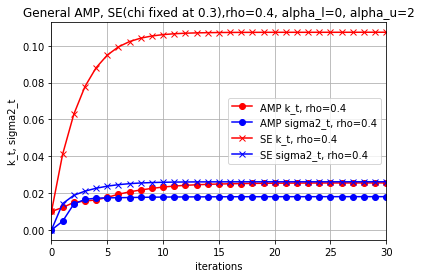

In [388]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,2)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.4",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.4",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.4",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.4",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.4, alpha_l=0, alpha_u=2")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [389]:
amp2_update[2]

[0.01,
 0.012194957447505856,
 0.01489372984032789,
 0.01564731293817337,
 0.01629200972187066,
 0.01766377106236463,
 0.019368406052011646,
 0.02066866982310892,
 0.021682024519950164,
 0.022543193791927707,
 0.023258056129676647,
 0.02379764484785846,
 0.024198051643503967,
 0.02450395494531803,
 0.024732717170156744,
 0.02491309347983996,
 0.025050983343061113,
 0.02515958909288902,
 0.02524541148096598,
 0.025308773190142336,
 0.025361439097649315,
 0.025399336499321735,
 0.025428588981679105,
 0.025450582513653466,
 0.025466268375206713,
 0.025479082844691487,
 0.025490348336704365,
 0.02550076147221658,
 0.02550543762823234,
 0.025511323646851446,
 0.025518106461428325,
 0.025519922274271127,
 0.025523447440259944,
 0.025526364341469834,
 0.0255271570701737,
 0.025526679954577657,
 0.025526611613916308,
 0.02552768679053683,
 0.025528321671697538,
 0.02552999800877207,
 0.025527351525265248,
 0.025529482414881743,
 0.02552846456592375,
 0.02553139596849709,
 0.02553284494559447,


In [390]:
amp2_update[3]

[0.0,
 0.004718609758403127,
 0.014050360091469673,
 0.016554453690207638,
 0.017239825002014042,
 0.017388618513389725,
 0.017481720408292777,
 0.01758133422451216,
 0.017679159115670612,
 0.01776309609775329,
 0.01782476551594809,
 0.017870806769162847,
 0.017906484286762836,
 0.01793626335907094,
 0.01796041342665874,
 0.017980388949632223,
 0.017995991484197862,
 0.01800582068425958,
 0.01801548978050872,
 0.018021754202677362,
 0.01802777528654443,
 0.018031571222000584,
 0.018034341900262887,
 0.018036792809879104,
 0.018039076081365204,
 0.018040567471820323,
 0.01804217654410591,
 0.018043284405458247,
 0.018043872582971927,
 0.018044261698413812,
 0.01804464799041999,
 0.018045171469221598,
 0.018045640595087786,
 0.018046107630598267,
 0.018045963284360984,
 0.018045403988963444,
 0.018045537483096653,
 0.018045734628582936,
 0.018046071700530266,
 0.018046134383925515,
 0.018046162855734172,
 0.018046396477929355,
 0.018046608217252735,
 0.018046001815518888,
 0.018046508274

In [391]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.5

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 600  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 47.657390117645264 seconds_pre-store ---


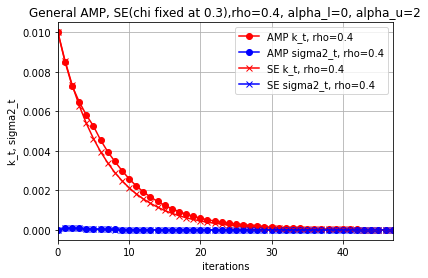

In [392]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,2)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.4",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.4",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.4",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.4",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.4, alpha_l=0, alpha_u=2")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

In [393]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.5

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 300  # dimension
m = 900  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

--- 66.57174611091614 seconds_pre-store ---


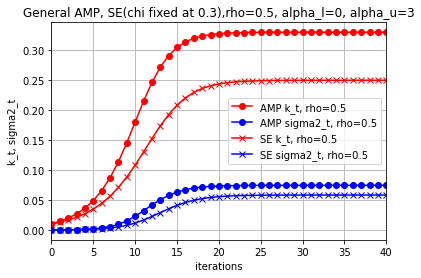

In [394]:
amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,3)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.5",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.5",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.5",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.5",marker="x")
#plt.plot(idx_[10],SEcollect[10][0],c="indigo",label="SE k_t, rho=0.9",marker="o")
plt.title("General AMP, SE(chi fixed at 0.3),rho=0.5, alpha_l=0, alpha_u=3")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()

--- 48.44542407989502 seconds_pre-store ---


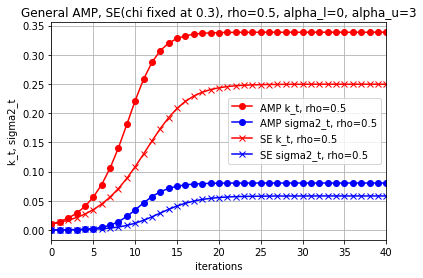

In [396]:
# Homework6(AMP and SE - pre-store y^* second version fixed chi comparison) - alhpa=3
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import time
import math
start_time = time.time()

rho = 0.5

#hash table: pre-store all the possible y^*
def y_s(p,t):
    eps = 1e-12 #epsilon
    y_gst = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_gst-y_pre)>eps:
        y_pre = y_gst
        y_gst = np.sqrt(t)*(2*rho*np.cosh(p+np.sqrt(t)*y_pre)-math.exp(-(p+np.sqrt(t)*y_pre)))/(2*rho*np.sinh(p+np.sqrt(t)*y_pre)+math.exp(-(p+np.sqrt(t)*y_pre)))
    return y_gst

hash_y = dict()
keyIdx = []
for i in np.arange(-20,20,0.0001):
    keyIdx.append(round(i,4))
for j in keyIdx:
    hash_y[j]=y_s(j,0.3)
print("--- %s seconds_pre-store ---" % (time.time() - start_time))

#sampling
n = 500  # dimension
m = 1500  # data
alpha = m/n
s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > rho:
        x[i] = np.random.multivariate_normal(mean1, cov)
    else:
        x[i] = np.random.multivariate_normal(mean2, cov)
        
def F(p,t): #F function
    return hash_y[p]/np.sqrt(t)

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_p(s, p, chi):
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = round((1/np.sqrt(n))*x[u]@s - chi*F(p[u],chi),4)
    return p_d

def update_s(s, p, chi):
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*F(p[j],chi) -(1/n)*s[i]*x[j][i]**2*T(p[j],chi))
        s_d[i] = sum_
    return s_d

def amp2(chi):
    #collcetion of AMP2
    p_collect_amp2 = []
    s_collect_amp2 = []
    k_collect_amp2 = []
    sigma2_collect_amp2 = []

    itermax= 100
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-12
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps and iter_amp2<itermax:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p(s_0,p_0, chi)
        s_new = update_s(s_0,p_new, chi)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

def se2(chi,alpha_l,alpha_u):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-12
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(0.01)
    sigma2_collect_se2.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f_1 = 0
        sum_f_2 = 0
        sum_f2_1 = 0
        sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_f_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(round(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
            sum_f2_2 += np.exp(-1/2*z**2)*F(round(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,4),chi)**2/np.sqrt(2*np.pi)/10
        k_new = chi*(alpha_l + alpha_u*(rho*sum_f_1 - (1-rho)*sum_f_2))
        sigma_new = chi**2*(alpha_l + alpha_u*(rho*sum_f2_1 + (1-rho)*sum_f2_2))
        parameter_new = np.array([k_new,sigma_new])
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

amp2_update = amp2(0.3)
l = len(amp2_update[0])
idx = []
for i in range(l):
    idx.append(i)

SEcollect = se2(0.3,0,3)
l2 = len(SEcollect[0])
idx2 = []
for i in range(l2):
    idx2.append(i)

minlen=min(l,l2)

plt.plot(idx,amp2_update[2],c="r",label="AMP k_t, rho=0.5",marker="o")
plt.plot(idx,amp2_update[3],c="b",label="AMP sigma2_t, rho=0.5",marker="o")
plt.plot(idx2,SEcollect[0],c="r",label="SE k_t, rho=0.5",marker="x")
plt.plot(idx2,SEcollect[1],c="b",label="SE sigma2_t, rho=0.5",marker="x")
plt.title("General AMP, SE(chi fixed at 0.3), rho=0.5, alpha_l=0, alpha_u=3")
plt.ylabel("k_t, sigma2_t")
plt.xlabel("iterations")
plt.xlim(0,minlen-1)
plt.grid()
plt.legend()
plt.show()